In [1]:
import numpy as np 
import pandas as pd 


In [2]:
df = pd.read_csv("spam.csv",encoding='ISO-8859-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Data Cleaning & EDA

In [5]:
df = df.iloc[:,0:2]

In [6]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [7]:
df.dropna(inplace = True)

C:\Users\ashut\AppData\Local\Temp\ipykernel_10608\1791587065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


In [8]:
df.duplicated().sum()

403

In [9]:
df.drop_duplicates(inplace=True)

C:\Users\ashut\AppData\Local\Temp\ipykernel_10608\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   object
 1   v2      5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
Encoder = LabelEncoder()
df.iloc[:,0] = Encoder.fit_transform(df.iloc[:,0])
df


C:\Users\ashut\AppData\Local\Temp\ipykernel_10608\2560658178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,0] = Encoder.fit_transform(df.iloc[:,0])


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
# df["v1"] = df['v1'].apply(lambda x: "text_result" if len(x) > 1 else x) 

In [15]:
df = df[df["v1"] != "text_result"]

In [16]:
df['v1'] = df['v1'].astype('int')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   int32 
 1   v2      5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


In [18]:
df.iloc[15].v2

'XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL'

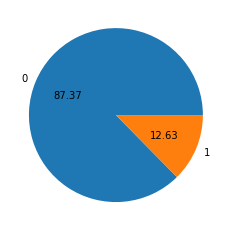

In [19]:
# to visualize nicely spam column
import matplotlib.pyplot as plt
plt.pie(df['v1'].value_counts(),labels=['0','1'],autopct="%0.2f")
plt.show()

In [20]:
import nltk

In [21]:
# downloading dependencies
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['char_count']=df['v2'].apply(len)

In [23]:
df['words_count']=df['v2'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df['sent_count']=df['v2'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [25]:
df.head(5)

,v1,v2,char_count,words_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df.describe()

,v1,char_count,words_count,sent_count
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [27]:
# not spam
df[df['v1']==0][['char_count','words_count','sent_count']].describe()

,char_count,words_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
# SPAM
df[df['v1']==1][['char_count','words_count','sent_count']].describe()

,char_count,words_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [29]:
# plot histogram for both category
import seaborn as sns

<AxesSubplot:xlabel='char_count', ylabel='Count'>

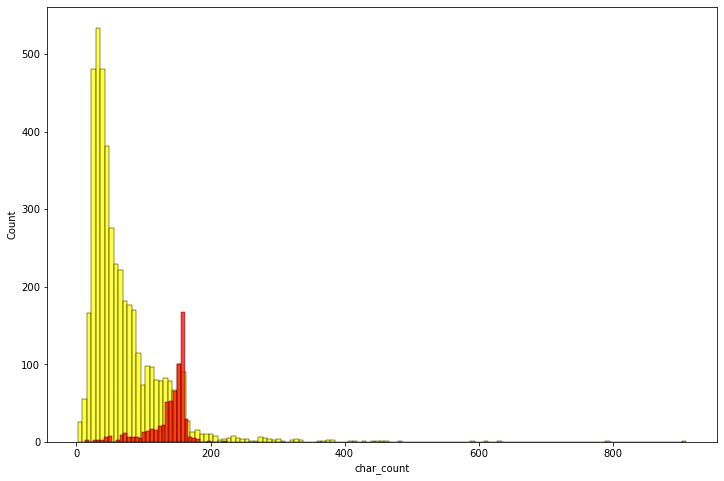

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['v1']==0]['char_count'],color='yellow')
sns.histplot(df[df['v1']==1]['char_count'],color='red')

<AxesSubplot:xlabel='words_count', ylabel='Count'>

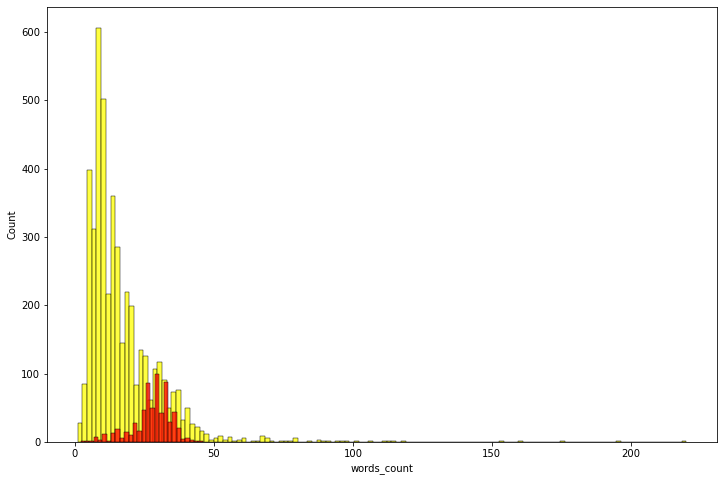

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['v1']==0]['words_count'],color='yellow')
sns.histplot(df[df['v1']==1]['words_count'],color='red')

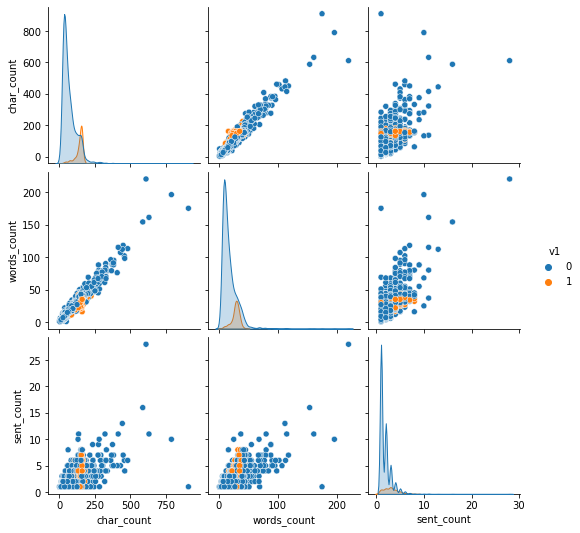

In [32]:
 sns.pairplot(df,hue='v1')

<AxesSubplot:>

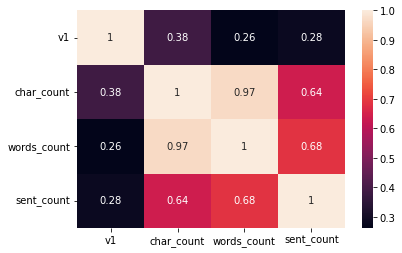

In [33]:
sns.heatmap(df.corr(),annot=True)

# Steps:-
##### * Lower case data
##### * Tokenization
##### * Removing special characters
##### * Removin stop words and punctautions
##### * Stemming



In [34]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
ps=PorterStemmer()
import string
def transform_mails(mails):
    mails=mails.lower()
    mails=nltk.word_tokenize(mails)
    
    y=[]
    for i in mails:
        if i.isalnum():
            y.append(i)
    mails = y[:]
    y.clear()
    
    for i in mails:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    
    mails=y[:]
    y.clear()
    
    for i in mails:
        y.append(ps.stem(i))
    
    return " ".join(y)
    

In [36]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
ps=PorterStemmer()
import string
def transform_mails(mails):
    mails=mails.lower()
    mails=nltk.word_tokenize(mails)
    
    y=[]
    for i in mails:
        if i.isalnum():
            y.append(i)
    mails = y[:]
    y.clear()
    
    for i in mails:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    
    mails=y[:]
    y.clear()
    
    for i in mails:
        y.append(ps.stem(i))
    
    return " ".join(y)
    df['spam'][0]

In [37]:
df['transformed_text']=df['v2'].apply(transform_mails)

In [38]:
df

,v1,v2,char_count,words_count,sent_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
cv = CountVectorizer(stop_words='english',max_features=10000)

In [41]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [42]:
y = df["v1"].values

In [43]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [44]:
#getting most frequent used words in spam mails
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500, min_font_size=10,background_color='white')

In [45]:
spam_wc=wc.generate(df[df['v1']==1]['transformed_text'].str.cat(sep=" ")) 

Text(0.5, 1.0, 'Spam words')

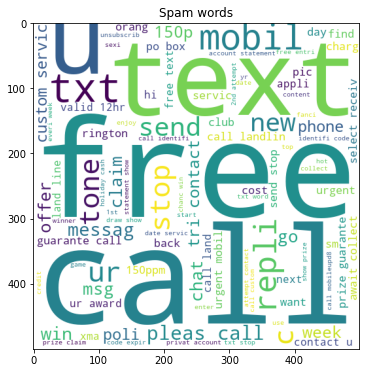

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title("Spam words")

In [47]:
Non_spam_wc=wc.generate(df[df['v1']==0]['transformed_text'].str.cat(sep=" "))

Text(0.5, 1.0, 'Non Spam words')

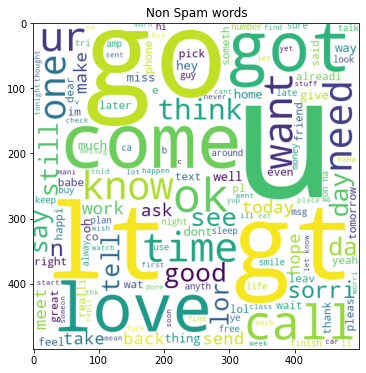

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(Non_spam_wc)
plt.title("Non Spam words")

In [49]:
# Splitting the data into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


In [50]:
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(1034, 6580)
(1034,)
(4135,)


# Model Building

In [51]:
scores=[]

In [52]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [53]:
clf = MultinomialNB()
bnf=BernoulliNB()
gnf=GaussianNB()


In [54]:
clf.fit(X_train, y_train)


MultinomialNB()

In [55]:
bnf.fit(X_train, y_train)


BernoulliNB()

In [56]:
gnf.fit(X_train, y_train)


GaussianNB()

In [57]:
y_train_pred=clf.predict(X_train)
y_train_predb=bnf.predict(X_train)
y_train_predg=gnf.predict(X_train)

print("MultinomialNB TRaining accuracy is: ",accuracy_score(y_train,y_train_pred))
print("BernoulliNB training accuracy_score:",accuracy_score(y_train,y_train_predb))
print("GaussianNB training accuracy score",accuracy_score(y_train,y_train_predg))


MultinomialNB TRaining accuracy is:  0.9932285368802902
BernoulliNB training accuracy_score: 0.9801692865779927
GaussianNB training accuracy score 0.9194679564691657


In [58]:
y_pred = clf.predict(X_test)
y_predb=bnf.predict(X_test)
y_predg=gnf.predict(X_test)
Multinomial_acc=accuracy_score(y_test,y_pred)*100
Bernauli_acc=accuracy_score(y_test,y_predb)*100
Gausian_acc=accuracy_score(y_test,y_predg)*100
print("MultinomialNB Test accuracy is: ",accuracy_score(y_test,y_pred))
print("BernoulliNB Test accuracy is: ",accuracy_score(y_test,y_predb))
print("GaussianNB Test accuracy is: ",accuracy_score(y_test,y_predg))
scores.append(Multinomial_acc)
scores.append(Bernauli_acc)
scores.append(Gausian_acc)
print(scores)

MultinomialNB Test accuracy is:  0.9738878143133463
BernoulliNB Test accuracy is:  0.9545454545454546
GaussianNB Test accuracy is:  0.8520309477756286
[97.38878143133462, 95.45454545454545, 85.20309477756285]


In [59]:
len(cv.get_feature_names())

C:\Users\ashut\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


6580

In [60]:
len(cv.get_stop_words())

318

In [61]:
from sklearn.linear_model import LogisticRegression
linear_model=LogisticRegression()
linear_model.fit(X_train, y_train)

LogisticRegression()

In [62]:
linear_pred=linear_model.predict(X_test)
Linear_acc=accuracy_score(y_test,linear_pred)*100
scores.append(Linear_acc)

In [63]:
from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(X_train, y_train)


SVC()

In [64]:
svm_pred=svm_model.predict(X_test)
SVM_acc=accuracy_score(y_test,svm_pred)*100
scores.append(SVM_acc)

In [65]:
clf_params = MultinomialNB(alpha=2.0, fit_prior=False, class_prior=None)
clf_params.fit(X_train, y_train)
y_train_pred_param=clf_params.predict(X_train)
print("MultinomialNB TRaining accuracy is: ",accuracy_score(y_train,y_train_pred_param))

y_test_pred_param=clf_params.predict(X_test)
print("MultinomialNB Test accuracy is: ",accuracy_score(y_test,y_test_pred_param))


MultinomialNB TRaining accuracy is:  0.9646916565900846
MultinomialNB Test accuracy is:  0.9361702127659575


In [66]:
scores.append(accuracy_score(y_test,y_test_pred_param)*100)

In [67]:
scores

[97.38878143133462,
 95.45454545454545,
 85.20309477756285,
 96.5183752417795,
 95.84139264990328,
 93.61702127659575]

In [70]:
import matplotlib.pyplot as plt

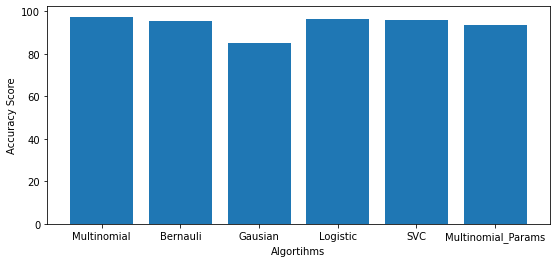

In [71]:
#lets plot the bar graph
ax=plt.figure(figsize=(9,4))
plt.bar(["Multinomial","Bernauli","Gausian","Logistic","SVC","Multinomial_Params"],scores,label='Accuracy')
plt.xlabel('Algortihms')
plt.ylabel('Accuracy Score')
plt.show()
